In [1]:
# Pixelwise classification with Random Forest
import numpy as np

X = np.load('X.npy') # 3D Greyscale
y = np.load('y.npy') # 3D Boolean

In [2]:
# import h5py
# with h5py.File('data-prepared.h5', 'w') as f:
#     f.create_dataset('X', data=X)
#     f.create_dataset('y', data=y)


In [3]:
import numpy as np
import matplotlib.pyplot as plt
from skimage import feature, future
from sklearn.ensemble import RandomForestClassifier
from functools import partial

In [125]:
# Downsample factor for images:
SKIP = 3

In [126]:
# Generate a tile dataset:
X_tiles = [
    X[i] for i in range(X.shape[0])
]
y_tiles = [
    y[i].astype(int) for i in range(y.shape[0])
]

KeyboardInterrupt: 

In [127]:
sigma_min = 1
sigma_max = 16
features_func = partial(
    feature.multiscale_basic_features,
    intensity=True,
    edges=True,
    texture=True,
    sigma_min=sigma_min,
    sigma_max=sigma_max,
)
clf = RandomForestClassifier(n_estimators=80, n_jobs=-1, max_depth=20, max_samples=0.08)
from tqdm.notebook import tqdm

for i in tqdm(range(int(0.02 * len(X_tiles)))):
    features = features_func(X_tiles[i][::SKIP, ::SKIP])
    clf = future.fit_segmenter(y_tiles[i][::SKIP, ::SKIP] + 1, features, clf)


  0%|          | 0/34 [00:00<?, ?it/s]

Text(0.5, 1.0, 'Image & ground truth\n')

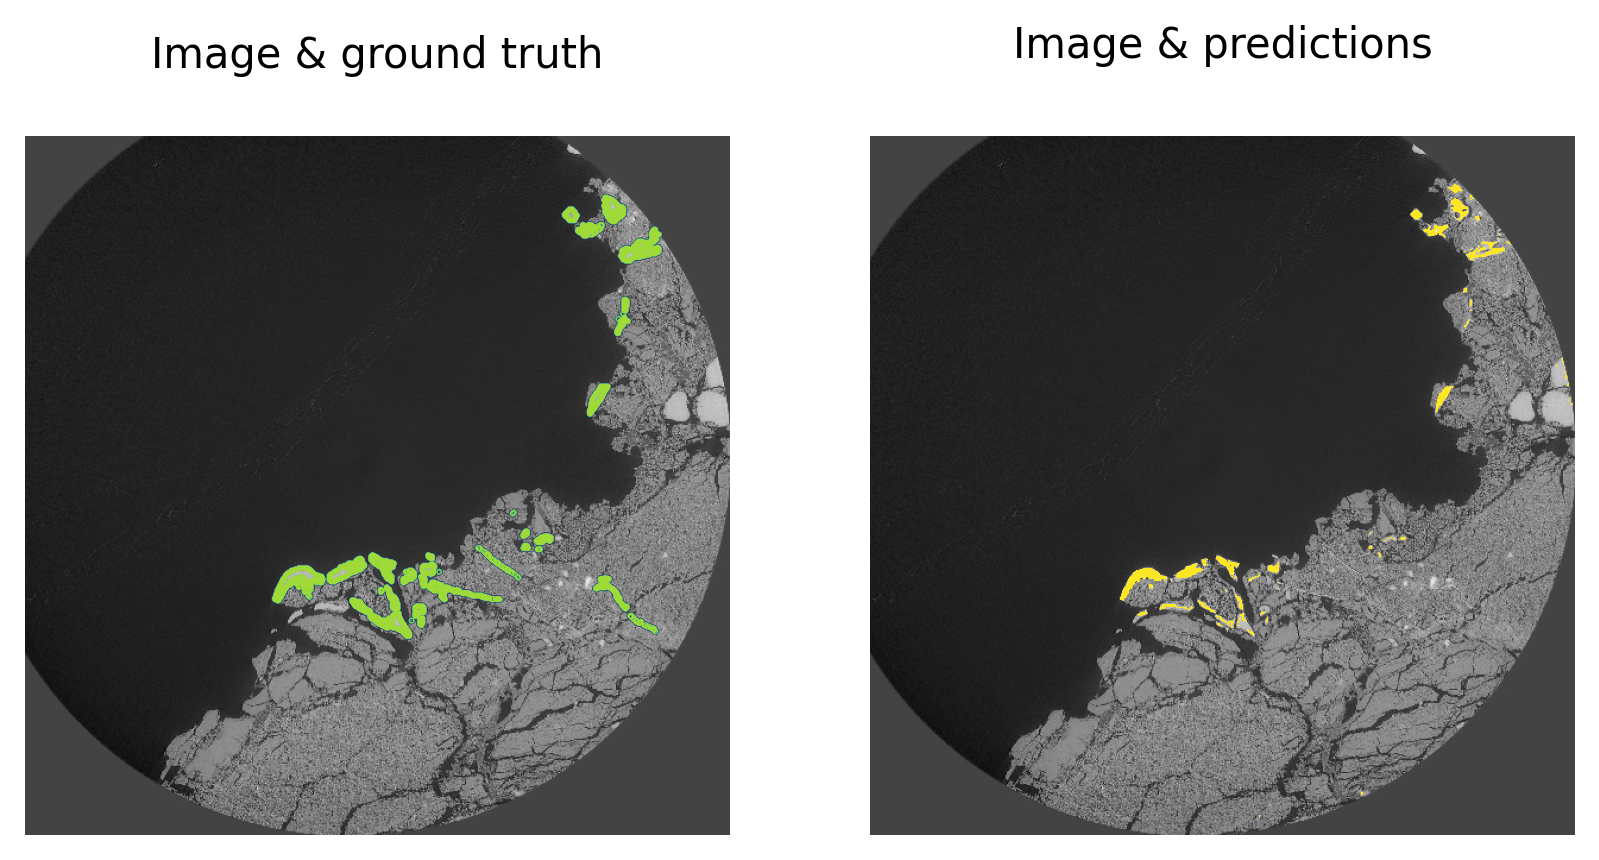

In [128]:
F = 50
features = features_func(X_tiles[F][::SKIP, ::SKIP])
result = future.predict_segmenter(features, clf)

fig, ax = plt.subplots(1, 2, sharex=True, sharey=True, figsize=(8, 4), dpi=250)
# ax[0].imshow(segmentation.mark_boundaries(X_tiles[F][SKIP,SKIP], result, mode='thin'))
# ax[0].contour(y_tiles[F][SKIP,SKIP])
ax[0].imshow(X_tiles[F][::SKIP, ::SKIP], cmap="gray")
ax[0].contour(y_tiles[F][::SKIP, ::SKIP])
ax[1].imshow(X_tiles[F][::SKIP, ::SKIP], cmap="gray")
ax[1].matshow(
    np.ma.masked_where(result == 1, result),
    interpolation="none",
    cmap="viridis",
    alpha=1,
    vmin=0,
    vmax=1,
)
# ax[1].imshow(result)
ax[0].set_axis_off()
ax[1].set_axis_off()
# fig.tight_layout()
ax[1].set_title("Image & predictions")
ax[0].set_title("Image & ground truth\n")


In [140]:
# Score the segmentation
from sklearn.metrics import accuracy_score
# 0.41723356009070295
accuracy_score(y_tiles[F][::SKIP,::SKIP]+1, result) 
# 0.6009070294784581


0.6343537414965986

In [135]:
np.random.uniform(0, 2, (y_tiles[F][::SKIP,::SKIP]+1).shape).astype(int)

array([[0, 1, 1, ..., 0, 1, 1],
       [0, 1, 1, ..., 0, 0, 1],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 1, ..., 1, 0, 1],
       [0, 0, 1, ..., 1, 0, 0],
       [0, 1, 1, ..., 0, 1, 0]])